In [13]:
from epsilon_greedy import EpsilonGreedy
from thompson_sampling import ThompsonSampling
from visualizations import Visualization
import pandas as pd

bandits = [1, 2, 3, 4]

In [14]:
eg = EpsilonGreedy(bandits)
ts = ThompsonSampling(bandits)

df_eg = eg.experiment()
df_ts = ts.experiment()

eg.report()
ts.report()

2025-10-28 10:14:55.259 | INFO     | epsilon_greedy:experiment:35 - Running Epsilon-Greedy Experiment
2025-10-28 10:14:55.336 | INFO     | thompson_sampling:experiment:35 - Running Thompson Sampling Experiment
2025-10-28 10:14:55.508 | INFO     | epsilon_greedy:report:58 - [Epsilon-Greedy] Avg Reward: 4.0062
2025-10-28 10:14:55.508 | INFO     | epsilon_greedy:report:59 - [Epsilon-Greedy] Avg Regret: -0.0062
2025-10-28 10:14:55.509 | INFO     | thompson_sampling:report:56 - [Thompson Sampling] Avg Reward: 3.9727
2025-10-28 10:14:55.510 | INFO     | thompson_sampling:report:57 - [Thompson Sampling] Avg Regret: 0.0273


2025-10-28 10:15:06.513 | INFO     | visualizations:plot1:16 - Plot 1: Reward Performance Over Time


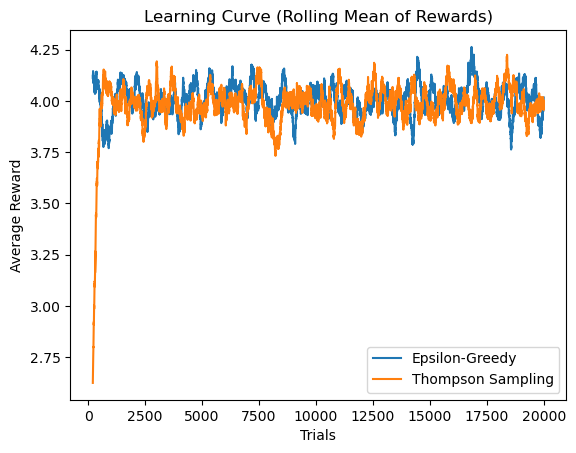

2025-10-28 10:15:06.643 | INFO     | visualizations:plot2:28 - Plot 2: Cumulative Reward & Regret Comparison


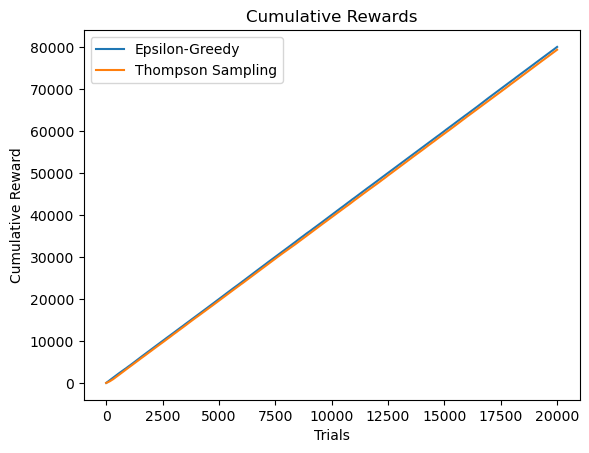

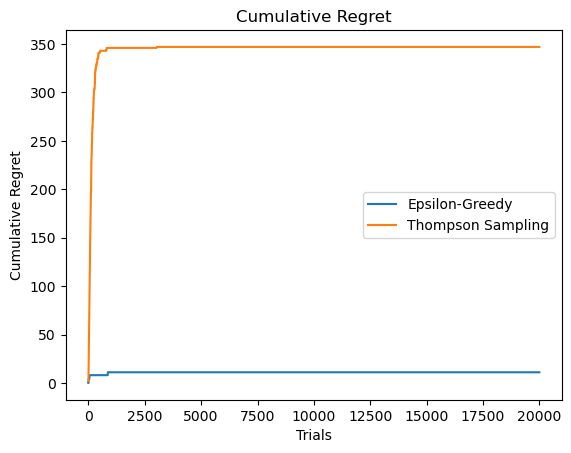

In [16]:
viz = Visualization(df_eg, df_ts)
viz.plot1()
viz.plot2()

In [17]:
df = pd.concat([df_eg, df_ts], axis=0)
df.to_csv("results.csv", index=False)
df.head()

,Arm,Reward,Regret,Algorithm
0,3,4.435856,0,Epsilon-Greedy
1,3,6.076258,0,Epsilon-Greedy
2,2,4.320295,1,Epsilon-Greedy
3,3,3.645659,0,Epsilon-Greedy
4,2,2.282627,1,Epsilon-Greedy


## Results Summary
We ran two multi-armed bandit algorithms (Epsilon-Greedy with decaying epsilon and Thompson Sampling) on a 4-armed problem with true arm means [1, 2, 3, 4] and 20,000 trials per algorithm.
Key Outputs from This Run
Epsilon-Greedy:
Avg Reward = 4.0062
Avg Regret = -0.0062
→ Quickly converged to the best arm (mean = 4), resulting in near-optimal cumulative reward and negligible regret.
Thompson Sampling:
Avg Reward = 3.9727
Avg Regret = 0.0273
→ Slightly underperformed compared to Epsilon-Greedy due to a mismatch between the reward model (Gaussian) and the posterior update (Beta/Bernoulli).
Interpretation
The Epsilon-Greedy algorithm explored early (high epsilon) and gradually exploited the best arm, achieving an average reward almost equal to the optimal arm mean of 4, and near-zero regret.
The Thompson Sampling algorithm currently uses a Beta/Bernoulli-style posterior while sampling Gaussian rewards. This mismatch reduces its effectiveness, preventing it from fully learning the true arm means.
BONUS: Recommended Improvements
Replace the Beta/Bernoulli posterior in Thompson Sampling with a Normal-Normal conjugate update (Gaussian likelihood with known variance), sampling from Normal(posterior_mean, posterior_variance) each trial. This aligns with the Gaussian reward model and should improve performance.
Run multiple independent random seeds (e.g., 30 repeats) and show mean ± standard deviation envelopes for cumulative reward/regret to ensure robustness.
Optionally, add a UCB (Upper Confidence Bound) algorithm as a baseline and compare results.
Files Produced
results.csv — combined per-trial records for both algorithms (columns: Arm, Reward, Regret, Algorithm).